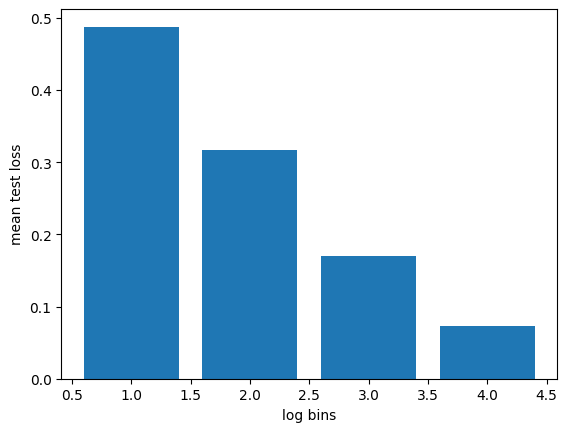

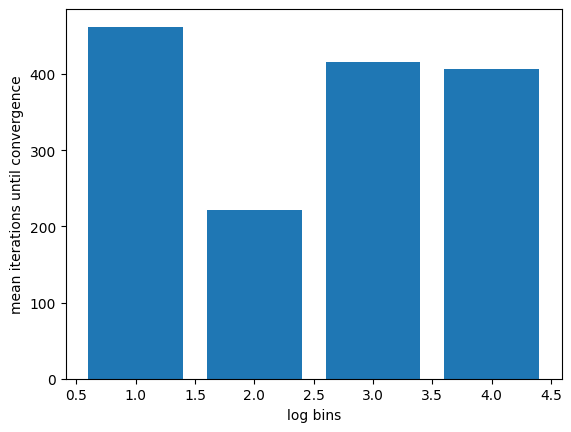

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))
"""
#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
"""
#loading sonar data
sonar_data = pd.read_csv("sonar.csv").to_numpy()
sonar_x = sonar_data[:,:-1]
sonar_x = scaler.fit_transform(sonar_x)
#add intercept
bias = np.ones((sonar_data.shape[0],1))
sonar_x = np.hstack((bias, sonar_x)).astype(float)
sonar_y = sonar_data[:,-1]
#convert labels to +1 -1
sonar_y = np.where(sonar_y == "M",1,-1)

bins = [1,2,3,4]

normal_iters, quant_iters,  w_quant, w = experiment(sonar_x,sonar_y, bins)

In [2]:
from QuantLog import quantlogistic
from NormalLog import normallogistic

#generate random w to test gradient func on
w_test = np.random.rand(sonar_x.shape[1]) *2 -1

loss, ng = normallogistic(w_test,sonar_x.T,sonar_y.T)
loss, qg1 = quantlogistic(w_test,sonar_x.T,sonar_y.T,1)
loss, qg2 = quantlogistic(w_test,sonar_x.T,sonar_y.T,2)
loss, qg3 = quantlogistic(w_test,sonar_x.T,sonar_y.T,3)

gradients = np.hstack((ng,qg1,qg2,qg3))
print(gradients)

[[-0.31973194 -0.39130435 -0.22705314 -0.07729469]
 [ 0.17133343  0.21663603  0.14088752  0.0511949 ]
 [ 0.20536004  0.25242322  0.1606627   0.05819051]
 [ 0.22211298  0.27043301  0.1693297   0.06259562]
 [ 0.23190301  0.28132803  0.18069654  0.06601106]
 [ 0.18136783  0.22541384  0.14506108  0.05356769]
 [ 0.13750282  0.17095685  0.10455737  0.03942631]
 [ 0.09982864  0.12419485  0.08606772  0.02729939]
 [ 0.11122417  0.14183511  0.09187692  0.02785208]
 [ 0.10170549  0.13895488  0.08345048  0.02972091]
 [ 0.07568004  0.10532893  0.06771368  0.02315911]
 [ 0.04706491  0.0731309   0.04868384  0.02044698]
 [ 0.02419954  0.04365949  0.03036314  0.01558438]
 [ 0.01444026  0.03095139  0.02179859  0.0171443 ]
 [ 0.10767886  0.13789563  0.09288544  0.0431639 ]
 [ 0.10102172  0.12818142  0.09048776  0.04079216]
 [ 0.07965252  0.09987896  0.08077456  0.03452735]
 [ 0.05656972  0.06942336  0.06285599  0.02919074]
 [ 0.02640524  0.03290395  0.0393967   0.0167087 ]
 [-0.03444383 -0.0315702  -0.00